# Analiza danych zbioru: Absenteeism at work - przewidywanie nieobecności
- Imię: **Kacper**
- Nazwisko: **Jarosik**
- Numer indeksu: ****245826**
- Przedmiot: **Analiza danych**
- Data: **Absenteeism at work**

## 1. Opis problemu

### a) Opis zbioru danych, cechy i źródło danych

#### Ogólny opis zbioru
Zbiór danych umożliwia kilka nowych kombinacji atrybutów i wykluczeń atrybutów lub modyfikację typu atrybutu (kategoryczny, całkowity lub rzeczywisty) w zależności od celu badania. Zbiór danych (Absenteeism at work - Part I) został wykorzystany w badaniach naukowych na Universidade Nove de Julho - Podyplomowym Programie Informatyki i Zarządzania Wiedzą.

**Źródło danych:** https://archive.ics.uci.edu/dataset/445/absenteeism+at+work

#### Opis cech
1. Identyfikacja indywidualna (ID)
2. Powód nieobecności (ICD).
Nieobecności poświadczone przez Międzynarodowy Kodeks Chorób (ICD) podzielone są na 21 kategorii (od I do XXI) w następujący sposób:

I Niektóre choroby zakaźne i pasożytnicze
II Nowotwory
III Choroby krwi i narządów krwiotwórczych oraz niektóre zaburzenia z udziałem mechanizmu immunologicznego
IV Choroby endokrynologiczne, odżywcze i metaboliczne
V Zaburzenia psychiczne i behawioralne
VI Choroby układu nerwowego
VII Choroby oka i przydatków
VIII Choroby ucha i wyrostka sutkowatego
IX Choroby układu krążenia
X Choroby układu oddechowego
XI Choroby układu pokarmowego
XII Choroby skóry i tkanki podskórnej
XIII Choroby układu mięśniowo-szkieletowego i tkanki łącznej
XIV Choroby układu moczowo-płciowego
XV Ciąża, poród i połóg
XVI Niektóre stany mające początek w okresie okołoporodowym
XVII Wrodzone wady rozwojowe, deformacje i nieprawidłowości chromosomowe
XVIII Objawy, oznaki i nieprawidłowe wyniki badań klinicznych i laboratoryjnych, niesklasyfikowane gdzie indziej
XIX Urazy, zatrucia i niektóre inne skutki przyczyn zewnętrznych
XX Zewnętrzne przyczyny zachorowalności i umieralności
XXI Czynniki wpływające na stan zdrowia i kontakt ze służbą zdrowia.

Oraz 7 kategorii bez (CID) obserwacji pacjenta (22), konsultacji lekarskiej (23), oddawania krwi (24), badania laboratoryjnego (25), nieusprawiedliwionej nieobecności (26), fizjoterapii (27), konsultacji stomatologicznej (28). 
3. Miesiąc nieobecności
4. Dzień tygodnia (poniedziałek (2), wtorek (3), środa (4), czwartek (5), piątek (6))
5. Pory roku (lato (1), jesień (2), zima (3), wiosna (4))
6. Koszty transportu
7. Odległość od miejsca zamieszkania do pracy (w kilometrach)
8. Czas służby
9. Wiek
10. Obciążenie pracą Średnie/dzień
11. Osiągnięty cel
12. Niewypełnienie obowiązku dyscyplinarnego (tak=1; nie=0)
13. Wykształcenie (liceum (1), studia podyplomowe (2), studia podyplomowe (3), magister i doktor (4))
14. Syn (liczba dzieci)
15. Towarzyski pijący (tak=1; nie=0)
16. Towarzyski palacz (tak=1; nie=0)
17. Zwierzę domowe (liczba zwierząt domowych)
18. Waga
19. Wzrost
20. Wskaźnik masy ciała
21. Czas nieobecności w godzinach (cel)

### b) Import potrzebnych bibliotek

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

### c) Załadowanie zbioru danych

In [362]:
# Wczytanie pliku Excel
file_path = "data\\Absenteeism_at_work.xls"
df = pd.read_excel(file_path)
df.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


## 2. Opis danch

### a) Statystyki opisowe

In [363]:
pd.set_option('display.max_columns', None)
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


### b) Wizualizacja danych

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Reason for absence'}>,
        <AxesSubplot:title={'center':'Month of absence'}>,
        <AxesSubplot:title={'center':'Day of the week'}>,
        <AxesSubplot:title={'center':'Seasons'}>],
       [<AxesSubplot:title={'center':'Transportation expense'}>,
        <AxesSubplot:title={'center':'Distance from Residence to Work'}>,
        <AxesSubplot:title={'center':'Service time'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Work load Average/day '}>],
       [<AxesSubplot:title={'center':'Hit target'}>,
        <AxesSubplot:title={'center':'Disciplinary failure'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Son'}>,
        <AxesSubplot:title={'center':'Social drinker'}>],
       [<AxesSubplot:title={'center':'Social smoker'}>,
        <AxesSubplot:title={'center':'Pet'}>,
        <AxesSubplot:title={'center':'Weight'}

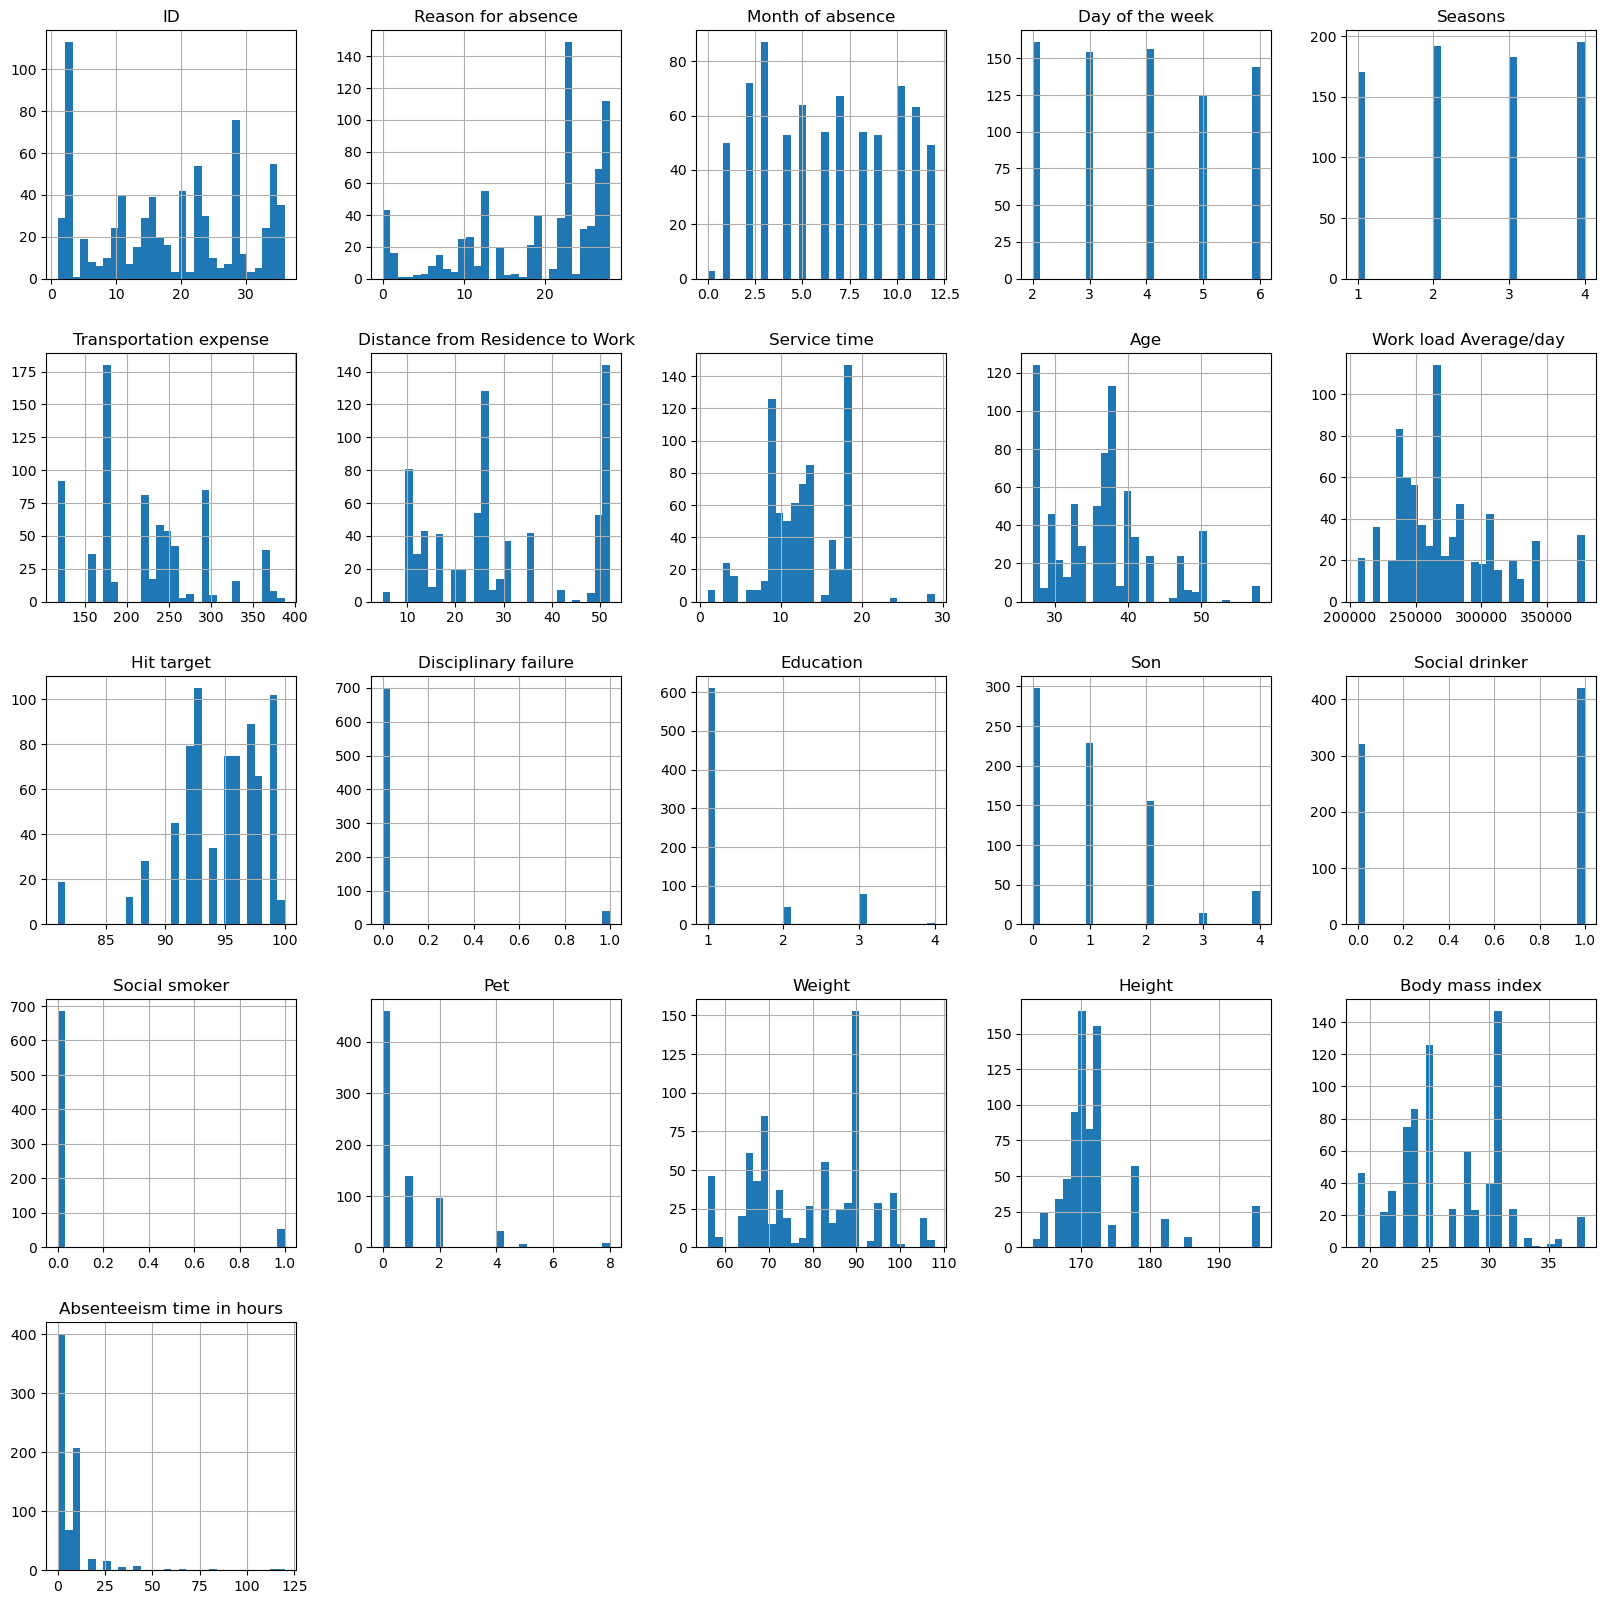

In [364]:
# histogramy dla wszystkich kolumn
df.hist(bins= 30, figsize=(20,20))

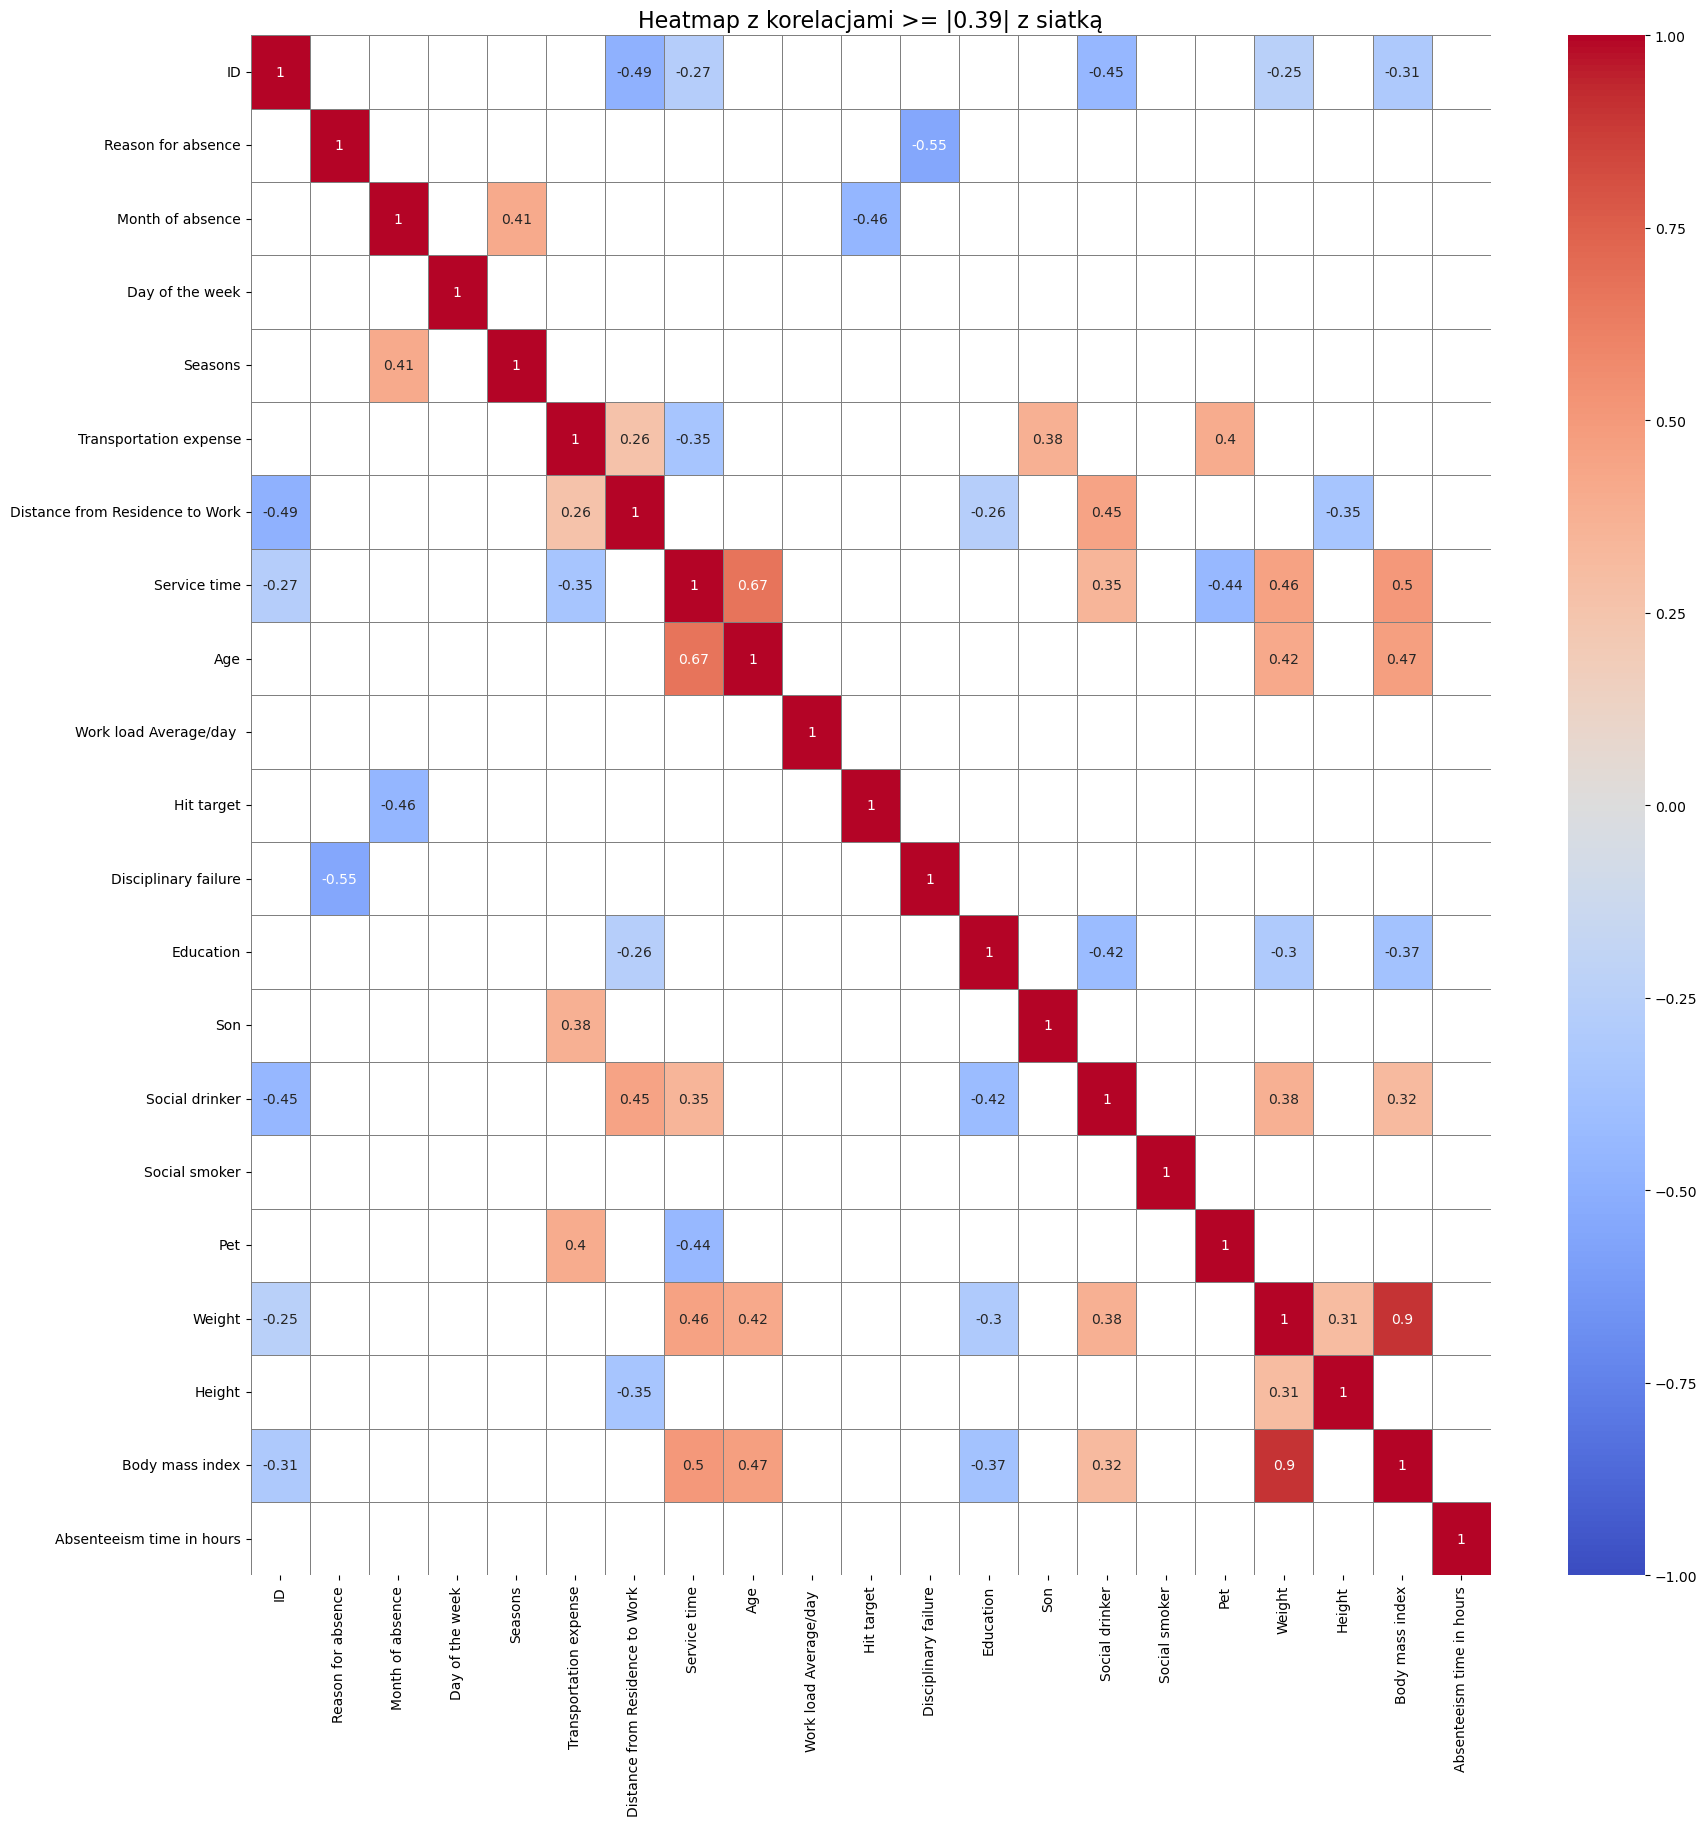

In [365]:
# korelacja
correlations = df.corr()
# Wyzerowanie wartości, których wartość absolutna jest mniejsza niż 0.25
threshold = 0.25
filtered_correlations = correlations.where(np.abs(correlations) >= threshold)

# Wykres
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(filtered_correlations.round(2), 
            annot=True, 
            cmap="coolwarm", 
            vmin=-1, 
            vmax=1, 
            cbar=True, 
            linewidths=0.5,
            linecolor='gray')
# Dodanie siatki dla osi
ax.set_xticks(np.arange(filtered_correlations.shape[1]) + 0.5, minor=True)
ax.set_yticks(np.arange(filtered_correlations.shape[0]) + 0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", bottom=False, left=False)

plt.title("Heatmap z korelacjami >= |0.39| z siatką", fontsize=16)
plt.show()

## 3. Przygotowanie danych

### a) Czyszczenie danych (w tym uzupełnianie pustów wartości, jeśli jest to konieczne)
Dane są kompletne: Na 740 wierszy w każdej z kolumny jest 740 wartości różnych od null

Problematyczne dane to 3x miesiąc przyjmuje wartość 0, gdzie normalny zasięg to 1-12: Zamiana 0 w miesiącach na najczęsciej wystapujący numer miesiąca w danym sezonie w bazie danych.

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [367]:
print('Dane początkowe')
print(df['Month of absence'].value_counts())

# Znalezienie najczęściej występującego miesiąca w każdym sezonie
most_common_month_per_season = (
    df[df['Month of absence'] != 0]  # Pomijamy rekordy z miesiącem = 0
    .groupby('Seasons')['Month of absence']
    .agg(lambda x: x.mode()[0])  # Znalezienie najczęściej występującej wartości
)

# Zamiana wartości 0 na odpowiednie miesiące
df.loc[df['Month of absence'] == 0, 'Month of absence'] = df.loc[df['Month of absence'] == 0, 'Seasons'].map(most_common_month_per_season)

# Sprawdzenie wyników
print('\nDane po zaastąpieniu 0 w miesiącach')
print(df['Month of absence'].value_counts())

Dane początkowe
3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64

Dane po zaastąpieniu 0 w miesiącach
3     87
2     73
10    71
7     68
5     65
11    63
8     54
6     54
9     53
4     53
1     50
12    49
Name: Month of absence, dtype: int64


### b) Wybór cech
Pozbycie się w pierwszej kolejności subiektywnych cech: id, wagi, wzrostu, wskaźnika masy ciała

Pozbycie się wartości sugerujących wynik: powód nieobecności

In [368]:
# Usuwanie wybranych kolumn
columns_to_drop = ['ID', 'Weight', 'Height', 'Body mass index', 'Reason for absence']
df_cleaned = df.drop(columns=columns_to_drop)

# Zaktualizowany DataFrame
df_cleaned

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Absenteeism time in hours
0,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,4
1,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,0
2,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,2
3,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,4
4,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,8
736,7,3,1,235,11,14,37,264604,93,0,3,1,0,0,1,4
737,7,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,0
738,2,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,0


### c) Dyskretyzacja danych
Zmiana Absenteeism time in hours na '1' jeśli większe od 0 i na '0' jeśli 0

In [369]:
df_cleaned['Absenteeism time in hours'] = df_cleaned['Absenteeism time in hours'].apply(lambda x: 1 if x > 0  else 0) 

## 4. Tworzenie modelu i ocena (2 algorytmów)

### a) Podziel zbiór danych (trening i test), sposób uzasadnij
Dane zostały podzielone na dane treningowe i testowe w proporcji 80:20. Ze względu na mały rozmiar zbioru znacznie przeważa część treningowa.

Dane są podzielone tak, by porównywalna część stanów 0 i 1 była w obu zbiorach

In [370]:
X = df_cleaned.drop(columns=['Absenteeism time in hours'])
y = df_cleaned['Absenteeism time in hours']
# Podział danych na zbiór treningowy (80%) i testowy (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Weryfikacja rozmiarów zbiorów
print(f"Rozmiar zbioru treningowego: {X_train.shape[0]} wierszy")
print(f"Rozmiar zbioru testowego: {X_test.shape[0]} wierszy")
print('\n================================================')

# Sprawdzenie proporcji w całym zbiorze
print("Proporcje w całym zbiorze danych:")
print(y.value_counts(normalize=True))
# Sprawdzenie proporcji w zbiorze treningowym
print("\nProporcje w zbiorze treningowym:")
print(y_train.value_counts(normalize=True))
# Sprawdzenie proporcji w zbiorze testowym
print("\nProporcje w zbiorze testowym:")
print(y_test.value_counts(normalize=True))


Rozmiar zbioru treningowego: 592 wierszy
Rozmiar zbioru testowego: 148 wierszy

Proporcje w całym zbiorze danych:
1    0.940541
0    0.059459
Name: Absenteeism time in hours, dtype: float64

Proporcje w zbiorze treningowym:
1    0.944257
0    0.055743
Name: Absenteeism time in hours, dtype: float64

Proporcje w zbiorze testowym:
1    0.925676
0    0.074324
Name: Absenteeism time in hours, dtype: float64


### b) Wskaż wykorzystaną metodę/algorytmy, ewentualnie najważniejsze parametry metody/algorytmu

In [371]:
# Tworzenie modeli
rf_model = RandomForestClassifier(random_state=0, n_estimators=100)  # Zmieniono na RandomForestClassifier
nb_model = GaussianNB()  # Tworzenie modelu Naive Bayes

# Trenowanie modelu Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
# Trenowanie modelu Naive Bayes
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

### c) Przedstaw wyniki oraz porównaj algorytmy według wskazanych metod oceny.

      Metryka  Random Forest  Naive Bayes
0  Dokładność       0.993243     0.905405
1    Precyzja       0.996377     0.462069
2     Czułość       0.954545     0.489051
3    Wynik F1       0.974372     0.475177


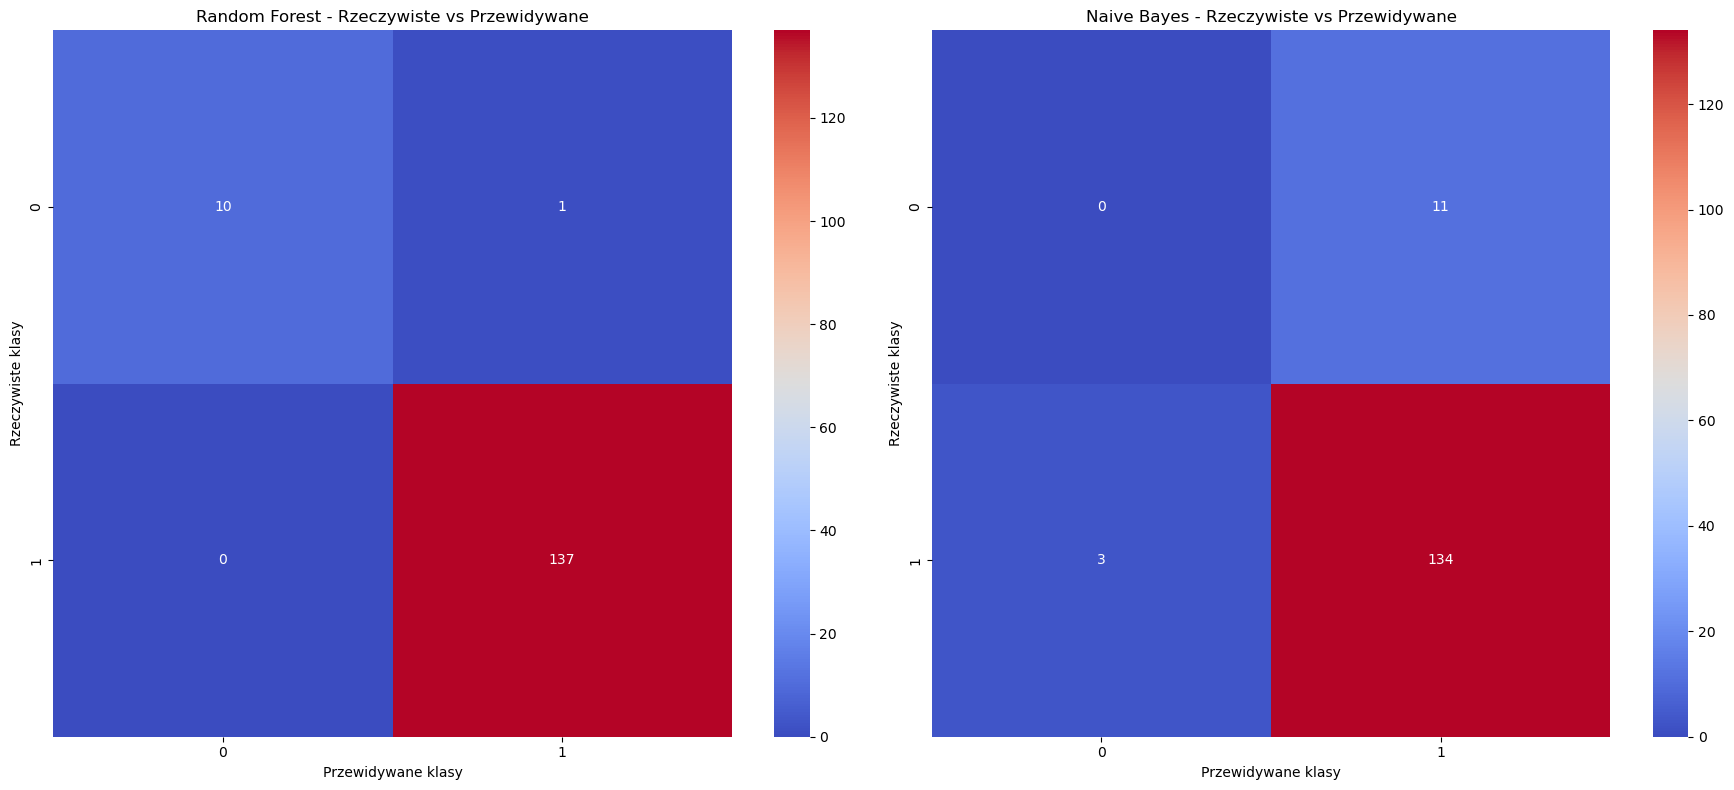

In [372]:
# Ocena modelu Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Ocena modelu Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)

# Tworzenie tabeli wyników
results = pd.DataFrame({
    'Metryka': ['Dokładność', 'Precyzja', 'Czułość', 'Wynik F1'],
    'Random Forest': [
        accuracy_rf,
        report_rf['macro avg']['precision'],
        report_rf['macro avg']['recall'],
        report_rf['macro avg']['f1-score']
    ],
    'Naive Bayes': [
        accuracy_nb,
        report_nb['macro avg']['precision'],
        report_nb['macro avg']['recall'],
        report_nb['macro avg']['f1-score']
    ]
})

# Wyświetlenie tabeli wyników
print(results)
# Przygotowanie danych dla Random Forest
rf_comparison = pd.DataFrame({
    "Rzeczywiste": y_test,
    "Przewidywane": y_pred_rf
})

# Przygotowanie danych dla Naive Bayes
nb_comparison = pd.DataFrame({
    "Rzeczywiste": y_test,
    "Przewidywane": y_pred_nb
})

# Tworzenie tabel krzyżowych
rf_heatmap = pd.crosstab(rf_comparison["Rzeczywiste"], rf_comparison["Przewidywane"])
nb_heatmap = pd.crosstab(nb_comparison["Rzeczywiste"], nb_comparison["Przewidywane"])

# Ustawienie wykresów obok siebie
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap dla Random Forest
sns.heatmap(rf_heatmap, annot=True, cmap="coolwarm", fmt="d", cbar=True, ax=axes[0])
axes[0].set_title("Random Forest - Rzeczywiste vs Przewidywane")
axes[0].set_xlabel("Przewidywane klasy")
axes[0].set_ylabel("Rzeczywiste klasy")

# Heatmap dla Naive Bayes
sns.heatmap(nb_heatmap, annot=True, cmap="coolwarm", fmt="d", cbar=True, ax=axes[1])
axes[1].set_title("Naive Bayes - Rzeczywiste vs Przewidywane")
axes[1].set_xlabel("Przewidywane klasy")
axes[1].set_ylabel("Rzeczywiste klasy")

# Dostosowanie układu
plt.tight_layout()
plt.show()

###  d) Przykładowy wynik klasyfikacji

In [373]:
# Generowanie losowych danych (przykład dla 5 wierszy)
random_data = {
    'Month of absence': np.random.randint(1, 13, 5),
    'Day of the week': np.random.randint(2, 6, 5),
    'Seasons': [], 
    'Transportation expense': np.random.randint(0, 1000, 5),
    'Distance from Residence to Work': np.random.randint(1, 150, 5),
    'Service time': np.random.randint(1, 50, 5),
    'Age': np.random.randint(18, 80, 5),
    'Work load Average/day ': np.random.randint(200, 400, 5),  # Spacja na końcu >.<
    'Hit target': np.random.randint(80, 100, 5),
    'Disciplinary failure': np.random.choice([0,1],5),
    'Education': np.random.randint(1, 4, 5),
    'Son': np.random.randint(0, 4, 5),
    'Social drinker': np.random.choice([0,1],5),
    'Social smoker': np.random.choice([0,1],5),
    'Pet': np.random.randint(0, 3, 5),
}

# Uzupełnianie kolumny 'Seasons' na podstawie 'Month of absence'
for month in random_data['Month of absence']:
    if 10 <= month <= 12:
        random_data['Seasons'].append(4)  # Zima
    elif 7 <= month <= 9:
        random_data['Seasons'].append(1)  # Lato
    elif 4 <= month <= 6:
        random_data['Seasons'].append(3)  # Wiosna
    elif 1 <= month <= 3:
        random_data['Seasons'].append(2)  # Jesień
# Konwersja słownika do DataFrame
random_row = pd.DataFrame(random_data)
# Przewidywanie wyników za pomocą modeli
y_pred_rf = rf_model.predict(random_row)
y_pred_nb = nb_model.predict(random_row)

# Wyświetlenie wyników
print("Random Forest Predictions:", y_pred_rf)
print("Naive Bayes Predictions:", y_pred_nb)
random_row

Random Forest Predictions: [1 0 1 0 0]
Naive Bayes Predictions: [0 1 0 1 1]


,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet
0,6,4,3,973,19,16,28,287,97,0,1,0,1,1,2
1,2,5,2,764,47,47,61,212,99,1,3,0,1,1,0
2,2,2,2,967,85,18,59,316,87,0,1,2,1,0,0
3,1,5,2,500,12,17,19,315,99,1,2,0,1,0,1
4,5,5,3,704,131,19,39,214,96,1,1,2,0,0,1


###  e) Wskaż lub wykonaj czynności poprawiające wynik.

Ciężko poprawić algorytm drzew losowych, który nie wykrywa zaledwie 1 przypadku. (zwiększenie ilości drzew nawet 100 krotnie nie zwiększa skuteczności)

Można natomiast poprawić wyniki dla Naive Bayes po przez pozbycie się mało znaczących cech, by zwiększyć oddziaływanie tych bardziej znaczących.

#### - Sprawdzenie korelacji targetu z cechami

<AxesSubplot:>

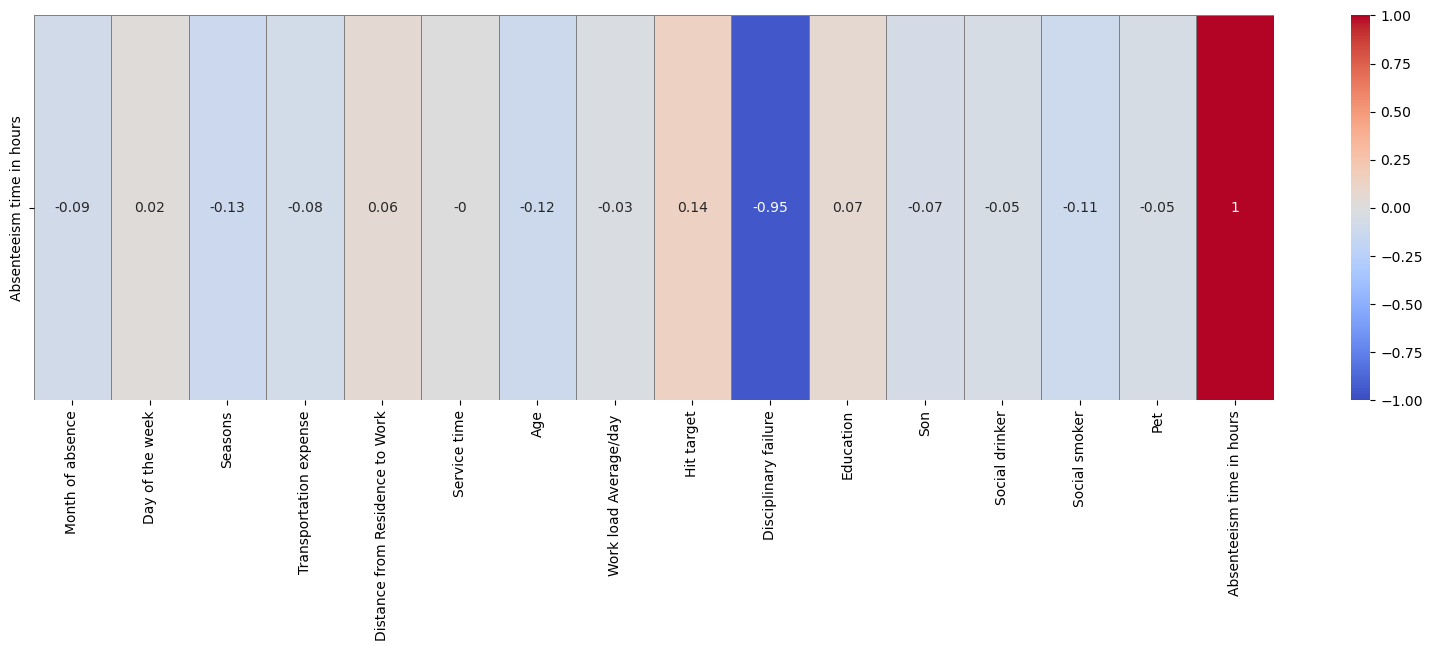

In [374]:
# Korelacja z 'Absenteeism time in hours'
correlation_with_target = df_cleaned.corr()['Absenteeism time in hours']

# Tworzenie DataFrame z korelacjami dla lepszej wizualizacji
correlation_df = correlation_with_target.to_frame().transpose()

# Wykres
f, ax = plt.subplots(figsize=(20, 5))  # Rozmiar dopasowany do jednego wiersza
sns.heatmap(correlation_df.round(2), 
            annot=True, 
            cmap="coolwarm", 
            vmin=-1, 
            vmax=1, 
            cbar=True, 
            linewidths=0.5,
            linecolor='gray')

#### - usunięcie cech, których modół korelacji z targetem jest mniejszy niż 0.1

In [375]:
# Korelacja wszystkich cech
correlations = df_cleaned.corr()

# Korelacja z 'Absenteeism time in hours'
target_correlation = correlations['Absenteeism time in hours']

# Wybierz kolumny, których korelacja jest większa niż 0.1 lub mniejsza niż -0.1
selected_columns = target_correlation[target_correlation.abs() >= 0.1].index.tolist()

# Utwórz nowy dataframe z wybranymi kolumnami
df_selected = df_cleaned[selected_columns]

# Wyświetlenie nowego dataframe
df_selected.head()


,Seasons,Age,Hit target,Disciplinary failure,Social smoker,Absenteeism time in hours
0,1,33,97,0,0,1
1,1,50,97,1,0,0
2,1,38,97,0,0,1
3,1,39,97,0,1,1
4,1,33,97,0,0,1


#### - podział danych na zbiory treningowe i testowe

In [376]:
X = df_selected.drop(columns=['Absenteeism time in hours'])
y = df_selected['Absenteeism time in hours']

# Podział danych na zbiór treningowy (80%) i testowy (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Weryfikacja rozmiarów zbiorów
print(f"Rozmiar zbioru treningowego: {X_train.shape[0]} wierszy")
print(f"Rozmiar zbioru testowego: {X_test.shape[0]} wierszy")
print('\n================================================')

# Sprawdzenie proporcji w całym zbiorze
print("Proporcje w całym zbiorze danych:")
print(y.value_counts(normalize=True))
# Sprawdzenie proporcji w zbiorze treningowym
print("\nProporcje w zbiorze treningowym:")
print(y_train.value_counts(normalize=True))
# Sprawdzenie proporcji w zbiorze testowym
print("\nProporcje w zbiorze testowym:")
print(y_test.value_counts(normalize=True))

Rozmiar zbioru treningowego: 592 wierszy
Rozmiar zbioru testowego: 148 wierszy

Proporcje w całym zbiorze danych:
1    0.940541
0    0.059459
Name: Absenteeism time in hours, dtype: float64

Proporcje w zbiorze treningowym:
1    0.944257
0    0.055743
Name: Absenteeism time in hours, dtype: float64

Proporcje w zbiorze testowym:
1    0.925676
0    0.074324
Name: Absenteeism time in hours, dtype: float64


#### - tworzenie modelu

In [377]:
# Tworzenie modeli
rf_model = RandomForestClassifier(random_state=0, n_estimators=100)  # Zmieniono na RandomForestClassifier
nb_model = GaussianNB()  # Tworzenie modelu Naive Bayes

# Trenowanie modelu Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Trenowanie modelu Naive Bayes
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

#### - ocena modeli po modyfikacji

      Metryka  Random Forest  Naive Bayes
0  Dokładność       0.993243     0.993243
1    Precyzja       0.996377     0.996377
2     Czułość       0.954545     0.954545
3    Wynik F1       0.974372     0.974372


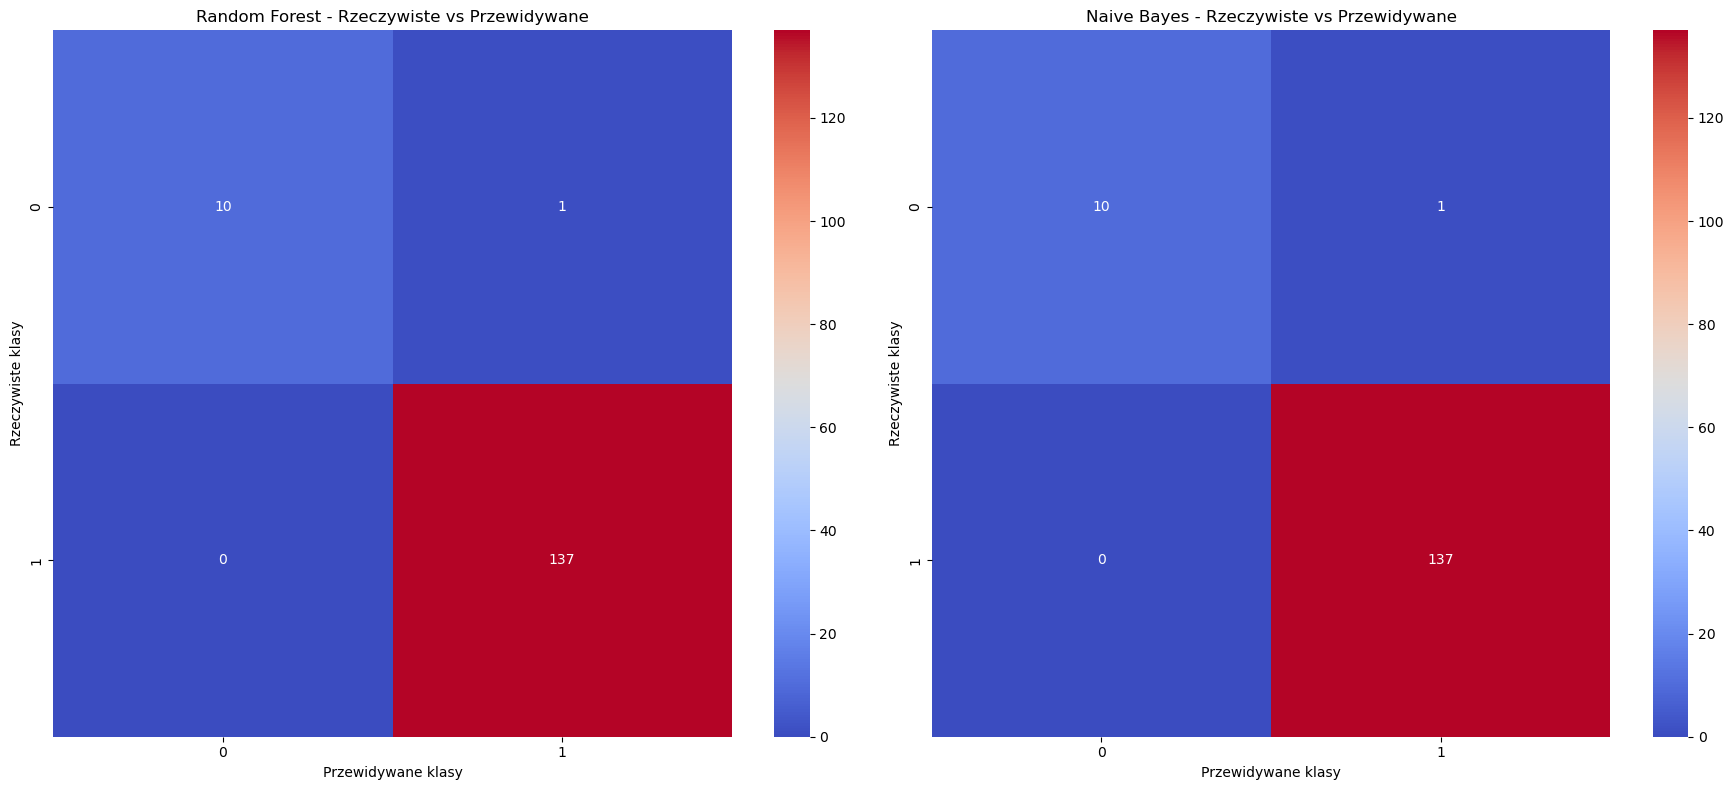

In [378]:
# Ocena modelu Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Ocena modelu Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)

# Tworzenie tabeli wyników
results = pd.DataFrame({
    'Metryka': ['Dokładność', 'Precyzja', 'Czułość', 'Wynik F1'],
    'Random Forest': [
        accuracy_rf,
        report_rf['macro avg']['precision'],
        report_rf['macro avg']['recall'],
        report_rf['macro avg']['f1-score']
    ],
    'Naive Bayes': [
        accuracy_nb,
        report_nb['macro avg']['precision'],
        report_nb['macro avg']['recall'],
        report_nb['macro avg']['f1-score']
    ]
})

# Wyświetlenie tabeli wyników
print(results)
# Przygotowanie danych dla Random Forest
rf_comparison = pd.DataFrame({
    "Rzeczywiste": y_test,
    "Przewidywane": y_pred_rf
})

# Przygotowanie danych dla Naive Bayes
nb_comparison = pd.DataFrame({
    "Rzeczywiste": y_test,
    "Przewidywane": y_pred_nb
})

# Tworzenie tabel krzyżowych
rf_heatmap = pd.crosstab(rf_comparison["Rzeczywiste"], rf_comparison["Przewidywane"])
nb_heatmap = pd.crosstab(nb_comparison["Rzeczywiste"], nb_comparison["Przewidywane"])

# Ustawienie wykresów obok siebie
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap dla Random Forest
sns.heatmap(rf_heatmap, annot=True, cmap="coolwarm", fmt="d", cbar=True, ax=axes[0])
axes[0].set_title("Random Forest - Rzeczywiste vs Przewidywane")
axes[0].set_xlabel("Przewidywane klasy")
axes[0].set_ylabel("Rzeczywiste klasy")

# Heatmap dla Naive Bayes
sns.heatmap(nb_heatmap, annot=True, cmap="coolwarm", fmt="d", cbar=True, ax=axes[1])
axes[1].set_title("Naive Bayes - Rzeczywiste vs Przewidywane")
axes[1].set_xlabel("Przewidywane klasy")
axes[1].set_ylabel("Rzeczywiste klasy")

# Dostosowanie układu
plt.tight_layout()
plt.show()

#### - wywołanie dla poprawionej wersji

In [379]:
# Generowanie losowych danych (przykład dla 5 wierszy)
random_data = {
    'Seasons': np.random.randint(1, 4, 5), 
    'Age': np.random.randint(18, 80, 5),
    'Hit target': np.random.randint(80, 100, 5),
    'Disciplinary failure': np.random.choice([0,1],5),
    'Social smoker': np.random.choice([0,1],5)
}

# Konwersja słownika do DataFrame
random_row = pd.DataFrame(random_data)
# Przewidywanie wyników za pomocą modeli
y_pred_rf = rf_model.predict(random_row)
y_pred_nb = nb_model.predict(random_row)

# Wyświetlenie wyników
print("Random Forest Predictions:", y_pred_rf)
print("Naive Bayes Predictions:", y_pred_nb)
random_row

Random Forest Predictions: [1 1 0 0 1]
Naive Bayes Predictions: [1 1 0 0 1]


,Seasons,Age,Hit target,Disciplinary failure,Social smoker
0,3,24,98,0,1
1,1,55,84,0,0
2,2,28,98,1,1
3,2,30,97,1,0
4,1,67,80,0,1


## 5. Podsumuj projekt

### a) Wnioski